In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [136]:
covid_data_file = "covid_data.csv"

covid_df = pd.read_csv(covid_data_file, sep = ",")

covid_df['total_deaths'] = covid_df['total_deaths']/1e3

covid_df.head()

,Unnamed: 0,date,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,1,2020-01-01,ABW,North America,Aruba,0,0,NaN,0.0,0,...,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN
1,2,2020-01-01,AFG,Asia,Afghanistan,0,0,NaN,0.0,0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
2,3,2020-01-01,AGO,Africa,Angola,0,0,NaN,0.0,0,...,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN
3,4,2020-01-01,AIA,North America,Anguilla,0,0,NaN,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN,NaN
4,5,2020-01-01,ALB,Europe,Albania,0,0,NaN,0.0,0,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2.17


In [127]:
%%capture
covid_df.columns

In [137]:
continents = list(set(covid_df["continent"]))

countries = list(set(covid_df["location"]))

countries = [x for x in countries if str(x) not in continents]

continents = [x for x in continents if str(x) != 'nan']

In [138]:
# setting plot parameters

plt.rcParams['axes.axisbelow'] = True

Creating plots for the total no. of deaths for each continent (over time)

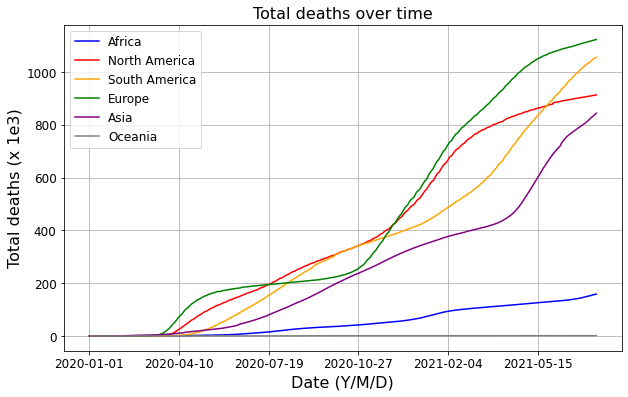

In [139]:
# subsetting the date for the continents
continent_df = covid_df.loc[covid_df['location'].isin(continents), ['date','location','total_deaths','total_deaths_per_million']]


# plotting the individual line charts for each continent on one plot
a = continent_df.loc[continent_df['location'] == 'Africa',['date','total_deaths']].plot(kind = 'line', x = 'date', y = 'total_deaths', figsize = (10,6), fontsize = 12, c = 'blue', label = 'Africa')
continent_df.loc[continent_df['location'] == 'North America', ['date','total_deaths']].plot(kind = 'line', x = 'date', y = 'total_deaths', ax = a, c = 'red', label = 'North America')
continent_df.loc[continent_df['location'] == 'South America', ['date','total_deaths']].plot(kind = 'line', x = 'date', y = 'total_deaths', ax = a, c = 'orange', label = 'South America')
continent_df.loc[continent_df['location'] == 'Europe', ['date','total_deaths']].plot(kind = 'line', x = 'date', y = 'total_deaths', ax = a, c = 'green', label = 'Europe')
continent_df.loc[continent_df['location'] == 'Asia', ['date','total_deaths']].plot(kind = 'line', x = 'date', y = 'total_deaths', ax = a, c = 'purple', label = 'Asia')
continent_df.loc[continent_df['location'] == 'Oceania', ['date','total_deaths']].plot(kind = 'line', x = 'date', y = 'total_deaths', ax = a, c = 'grey', label = 'Oceania', grid = True)

plt.xlabel('Date (Y/M/D)', fontsize = 16)
plt.ylabel('Total deaths (x 1e3)', fontsize = 16)
plt.title('Total deaths over time', fontsize = 16)
plt.legend(prop={"size":12})


Creating plots for the latest data on the total no. of deaths for each continent

Text(0.5, 1.0, 'Total deaths per million for each continent (2021-07-19)')

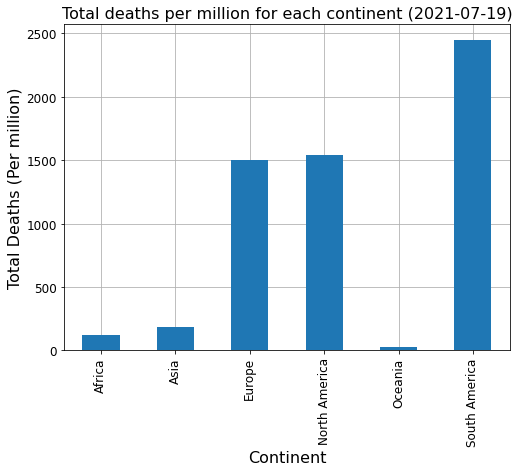

In [140]:
# getting the latest date
latest_date = max(set(covid_df["date"]))

# creating a mask
mask = covid_df['date'] == latest_date

# subsetting the latest data
latest_totals = covid_df.loc[mask, ['iso_code', 'continent', 'location', 'total_deaths', 'total_deaths_per_million', 'stringency_index']]

# subsetting the continents data
latest_continent_df = latest_totals.loc[latest_totals['location'].isin(continents), ['location','total_deaths','total_deaths_per_million']]

# creating bar chart 
latest_continent_df.plot(kind = 'bar', x = 'location', y = 'total_deaths_per_million', legend = False, figsize = (8,6), fontsize = 12, grid = True)


plt.xlabel("Continent", fontsize = 16)
plt.ylabel("Total Deaths (Per million)", fontsize = 16)
plt.title("Total deaths per million for each continent (" + latest_date + ")", fontsize = 16)


Text(0.5, 1.0, 'Total deaths per million vs Stringency index (2021-07-19)')

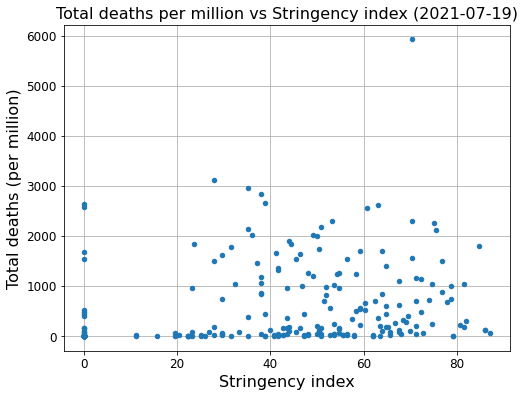

In [148]:
# subsetting the countries data
latest_countries_df = latest_totals.loc[latest_totals['location'].isin(countries), ['iso_code','location','total_deaths','total_deaths_per_million', 'stringency_index']]

# creating bar chart 
latest_countries_df.plot(kind = 'scatter', x = 'stringency_index', y = 'total_deaths_per_million', legend = False, figsize = (8,6), fontsize = 12, grid = True)


plt.xlabel("Stringency index", fontsize = 16)
plt.ylabel("Total deaths (per million)", fontsize = 16)
plt.title("Total deaths per million vs Stringency index (" + latest_date + ")", fontsize = 16)


Text(0.5, 1.0, 'Total deaths per million (Africa) (2021-07-19)')

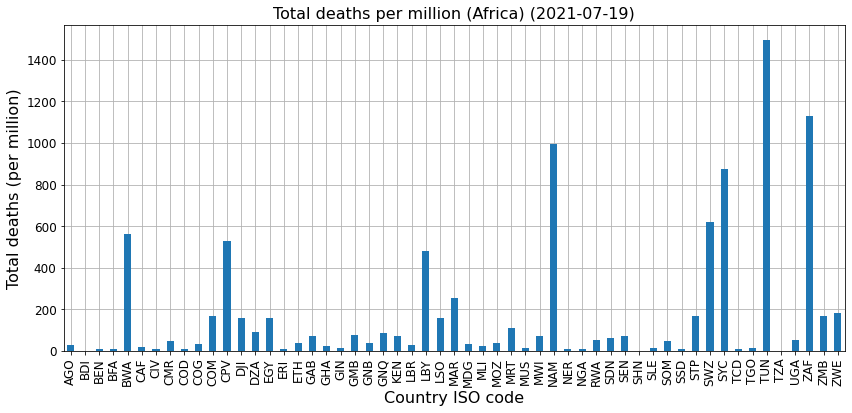

In [157]:
# bar charts of total deaths for each country of each continent

## Africa

latest_totals.loc[latest_totals['continent'] == 'Africa', ['iso_code', 'total_deaths_per_million']].plot(kind = 'bar', x = 'iso_code', y = 'total_deaths_per_million', legend = False, figsize = (14,6), fontsize = 12, grid = True)

plt.xlabel("Country ISO code", fontsize = 16)
plt.ylabel("Total deaths (per million)", fontsize = 16)
plt.title("Total deaths per million (Africa) (" + latest_date + ")", fontsize = 16)

Text(0.5, 1.0, 'Total deaths per million (Asia) (2021-07-19)')

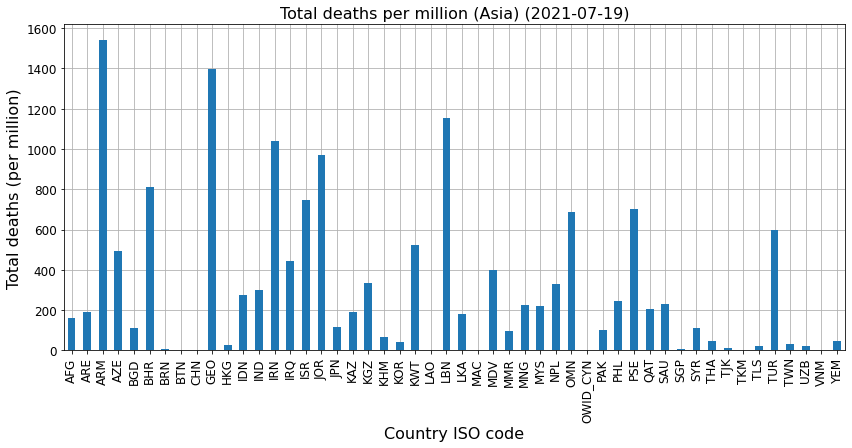

In [165]:
## Asia

latest_totals.loc[latest_totals['continent'] == 'Asia', ['iso_code', 'total_deaths_per_million']].plot(kind = 'bar', x = 'iso_code', y = 'total_deaths_per_million', legend = False, figsize = (14,6), fontsize = 12, grid = True)

plt.xlabel("Country ISO code", fontsize = 16)
plt.ylabel("Total deaths (per million)", fontsize = 16)
plt.title("Total deaths per million (Asia) (" + latest_date + ")", fontsize = 16)

Text(0.5, 1.0, 'Total deaths per million (Europe) (2021-07-19)')

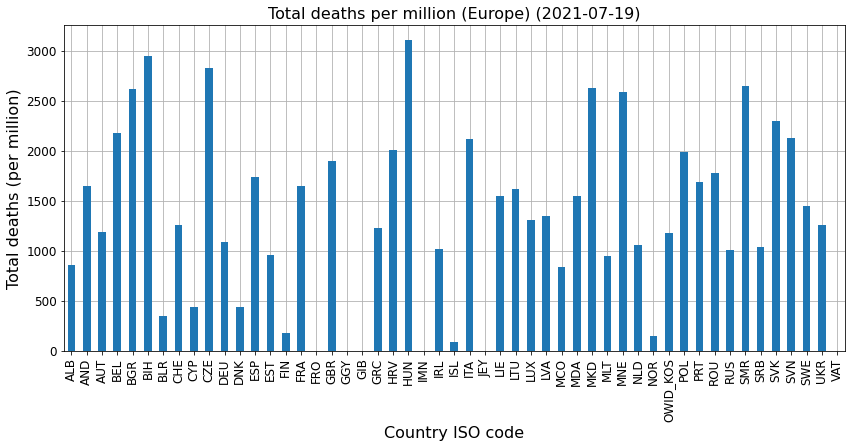

In [160]:
## Europe

latest_totals.loc[latest_totals['continent'] == 'Europe', ['iso_code', 'total_deaths_per_million']].plot(kind = 'bar', x = 'iso_code', y = 'total_deaths_per_million', legend = False, figsize = (14,6), fontsize = 12, grid = True)

plt.xlabel("Country ISO code", fontsize = 16)
plt.ylabel("Total deaths (per million)", fontsize = 16)
plt.title("Total deaths per million (Europe) (" + latest_date + ")", fontsize = 16)

Text(0.5, 1.0, 'Total deaths per million (North America) (2021-07-19)')

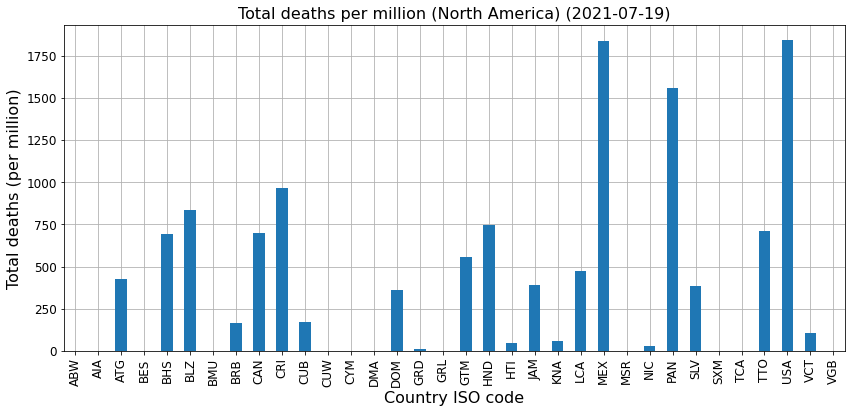

In [161]:
## North America

latest_totals.loc[latest_totals['continent'] == 'North America', ['iso_code', 'total_deaths_per_million']].plot(kind = 'bar', x = 'iso_code', y = 'total_deaths_per_million', legend = False, figsize = (14,6), fontsize = 12, grid = True)

plt.xlabel("Country ISO code", fontsize = 16)
plt.ylabel("Total deaths (per million)", fontsize = 16)
plt.title("Total deaths per million (North America) (" + latest_date + ")", fontsize = 16)

Text(0.5, 1.0, 'Total deaths per million (Oceania) (2021-07-19)')

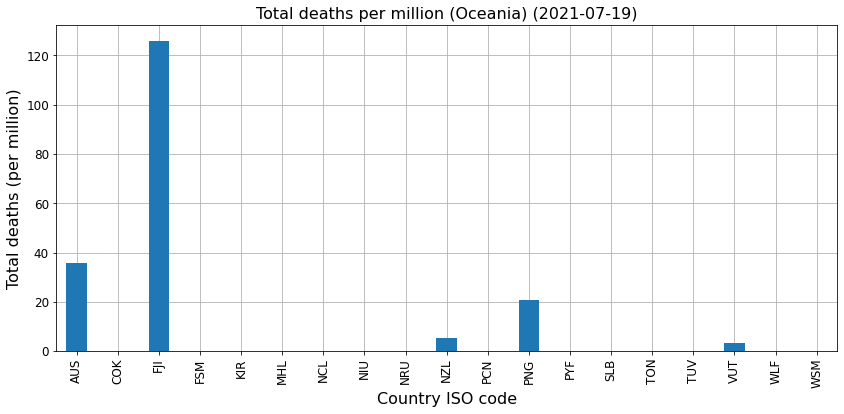

In [162]:
## Oceania

latest_totals.loc[latest_totals['continent'] == 'Oceania', ['iso_code', 'total_deaths_per_million']].plot(kind = 'bar', x = 'iso_code', y = 'total_deaths_per_million', legend = False, figsize = (14,6), fontsize = 12, grid = True)

plt.xlabel("Country ISO code", fontsize = 16)
plt.ylabel("Total deaths (per million)", fontsize = 16)
plt.title("Total deaths per million (Oceania) (" + latest_date + ")", fontsize = 16)

Text(0.5, 1.0, 'Total deaths per million (South America) (2021-07-19)')

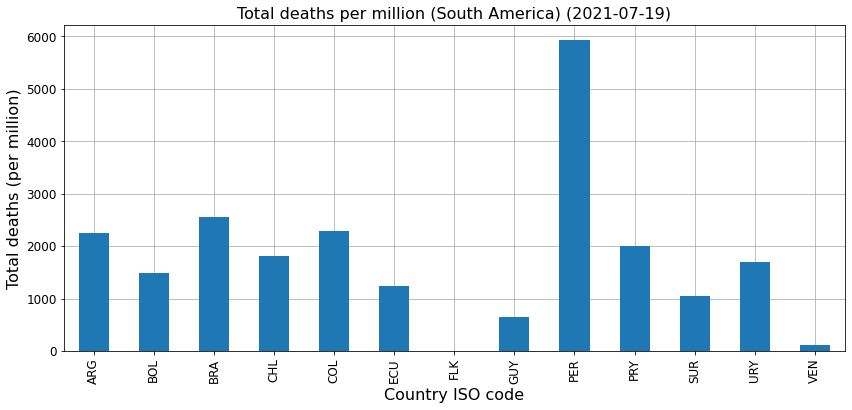

In [163]:
## South America

latest_totals.loc[latest_totals['continent'] == 'South America', ['iso_code', 'total_deaths_per_million']].plot(kind = 'bar', x = 'iso_code', y = 'total_deaths_per_million', legend = False, figsize = (14,6), fontsize = 12, grid = True)

plt.xlabel("Country ISO code", fontsize = 16)
plt.ylabel("Total deaths (per million)", fontsize = 16)
plt.title("Total deaths per million (South America) (" + latest_date + ")", fontsize = 16)